In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from collections import Counter

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time

In [19]:
df = pd.read_pickle('BASE PREPARADA MODELO.pkl')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 56 to 98373
Columns: 201 entries, target to MEPP_y_1
dtypes: float64(13), int8(188)
memory usage: 5.7 MB


In [21]:
ratio = 0.30

In [22]:
############### Com balanceamento com 3 classes###############

#Creating X and y:
X = df.drop(['target'], axis=1)
y = df['target']
#Data split into train and test:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio)
print('Distribuição das classes:', Counter(y))

Distribuição das classes: Counter({0: 16883, 1: 3101})


In [23]:
############### Com balanceamento com 3 classes###############

# Cria objeto SMOTE
smote = SMOTE(random_state=42)

# Realiza oversampling das classes minoritárias
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifica distribuição das classes após oversampling
print('Distribuição das classes após oversampling:', Counter(y_resampled))

#Data split into train and test:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=ratio)

Distribuição das classes após oversampling: Counter({0: 16883, 1: 16883})


In [24]:
num_hidden_layers =  3
num_neurons =  64
learning_rate = 0.001
batch_size = 64
epochs = 100

In [25]:
# Build the neural network model
model = Sequential()
model.add(Dense(num_neurons, input_dim=X_train_re.shape[1], activation='relu'))
for i in range(num_hidden_layers - 1):
    model.add(Dense(num_neurons, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and evaluate its performance on the validation set
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_re, y_train_re, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_test_re, y_test_re), callbacks=[early_stopping])
val_loss = np.min(history.history['val_loss'])

Epoch 1/100
370/370 [==============================] - 2s 3ms/step - loss: 0.6046 - accuracy: 0.6658 - val_loss: 0.5578 - val_accuracy: 0.7038
Epoch 2/100
370/370 [==============================] - 1s 3ms/step - loss: 0.5394 - accuracy: 0.7207 - val_loss: 0.5196 - val_accuracy: 0.7480
Epoch 3/100
370/370 [==============================] - 1s 3ms/step - loss: 0.5059 - accuracy: 0.7486 - val_loss: 0.4991 - val_accuracy: 0.7537
Epoch 4/100
370/370 [==============================] - 1s 3ms/step - loss: 0.4762 - accuracy: 0.7664 - val_loss: 0.4750 - val_accuracy: 0.7655
Epoch 5/100
370/370 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.7781 - val_loss: 0.4630 - val_accuracy: 0.7733
Epoch 6/100
370/370 [==============================] - 1s 3ms/step - loss: 0.4405 - accuracy: 0.7872 - val_loss: 0.4526 - val_accuracy: 0.7862
Epoch 7/100
370/370 [==============================] - 1s 3ms/step - loss: 0.4284 - accuracy: 0.7967 - val_loss: 0.4465 - val_accuracy: 0.7848

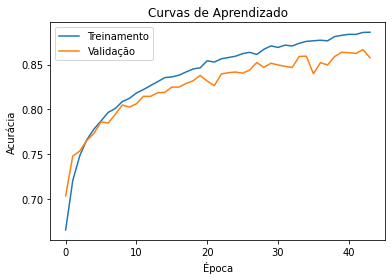

In [26]:
import matplotlib.pyplot as plt

# plotar as curvas de aprendizado
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curvas de Aprendizado')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()


In [27]:
# Printing out model metric reports
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_re)
y_pred_classes = (y_pred > 0.5).astype(int)
print(classification_report(y_test_re, y_pred_classes))

317/317 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5020
           1       0.84      0.89      0.86      5110

    accuracy                           0.86     10130
   macro avg       0.86      0.86      0.86     10130
weighted avg       0.86      0.86      0.86     10130



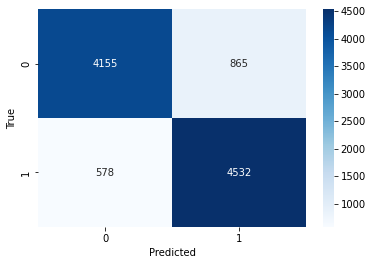

In [28]:
# gerar a matriz de confusão
#cm = confusion_matrix(y_pred_classes, y_pred_classes)

cm = confusion_matrix(y_test_re, y_pred_classes)
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
# # avaliar a rede neural nos dados de treinamento e validação
# train_scores = model.evaluate(X_train_re, y_train_re, verbose=0)
# val_scores = model.evaluate(X_train_re, y_test_re, verbose=0)

# # imprimir as métricas de avaliação
# print('Acurácia de Treinamento: %.2f%%' % (train_scores[1]*100))
# print('Acurácia de Validação: %.2f%%' % (val_scores[1]*100))

ValueError: Data cardinality is ambiguous:
  x sizes: 23636
  y sizes: 10130
Make sure all arrays contain the same number of samples.